In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)#adjesting  the config of plots we create
df=pd.read_csv('G:\Downloads\movies.csv')


In [2]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
df['genre'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: genre, Length: 7668, dtype: bool

In [4]:
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,percent_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
# replacing nulls with zeros
np.mean(df['votes'].isnull())

0.0003912363067292645

In [6]:
df['votes']=df['votes'].fillna(0);
df['score']=df['score'].fillna(0);
df['star']=df['star'].fillna(0);
df['budget']=df['budget'].fillna(0);
df['gross']=df['gross'].fillna(0);
df['runtime']=df['runtime'].fillna(0);

In [7]:
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,percent_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0003912363067292645%
star-0.0%
country-0.0003912363067292645%
budget-0.0%
gross-0.0%
company-0.002217005738132499%
runtime-0.0%


In [8]:
#looking at data types
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
#changing data type
df['votes'].astype('int16')
df['budget'].astype('int64')
df['gross'].astype('int64')

0        46998772
1        58853106
2       538375067
3        83453539
4        39846344
          ...    
7663            0
7664            0
7665            0
7666            0
7667            0
Name: gross, Length: 7668, dtype: int64

In [10]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,0.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,NaN,120.0


In [11]:
##df['released'].astype(str).str[:4]

In [12]:
#for viewing all data
#for viewing all data
pd.set_option('display.max_row',None)

In [37]:
df=df.sort_values('gross',ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [14]:
#for viewing 6 only data
pd.set_option('display.max_row',6)

In [15]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0.0,0.000000e+00,Trans World Entertainment (TWE),89.0
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0.0,0.000000e+00,Budapest Stúdió Vállalat,104.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0.0,0.000000e+00,PK 65 Films,102.0


In [16]:
#droping dublicates
df['name'].drop_duplicates().sort_values(ascending=False)

4722                      Æon Flux
4761       xXx: State of the Union
7112    xXx: Return of Xander Cage
                   ...            
1013                'night, Mother
1006               'Round Midnight
6569                           '71
Name: name, Length: 7512, dtype: object

In [17]:
pd.set_option('display.max_rows',None)
#to see sisctent compenys
df['company'].drop_duplicates().sort_values(ascending=False)
pd.set_option('display.max_rows',6)

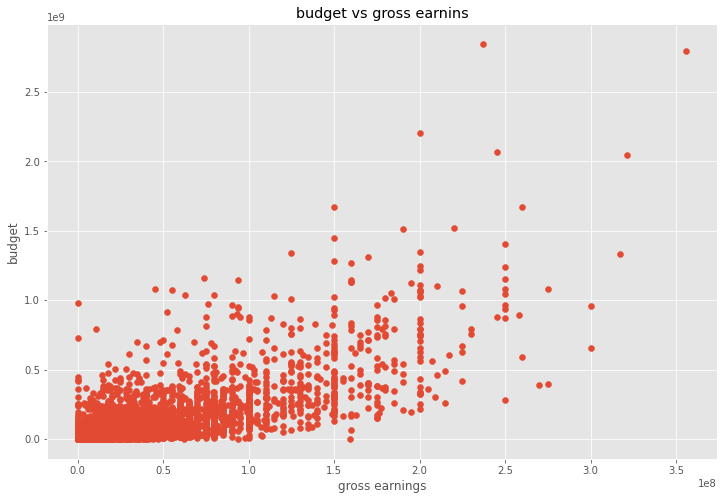

In [18]:
#corelattion ot scatterplot between budget & gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross earnins')
plt.xlabel('gross earnings')
plt.ylabel('budget')
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

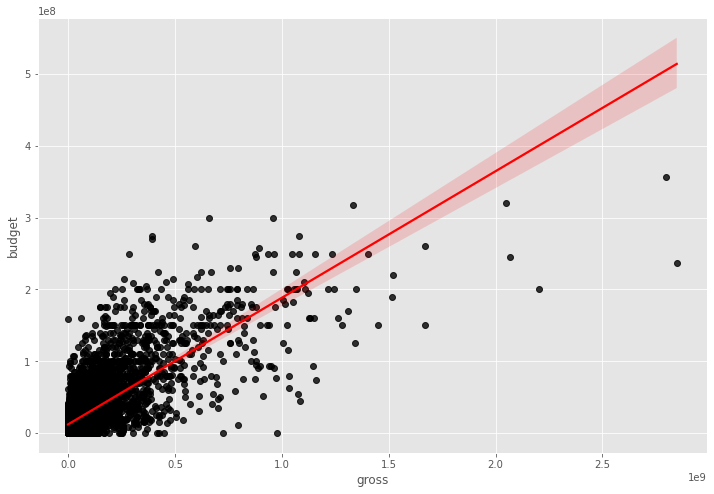

In [19]:
#using seaborn corellation
sns.regplot(x='gross',y='budget',data=df,scatter_kws={"color":"black"},line_kws={'color':'red'})

In [20]:
#corrilations 0.4 and aboue is good correlation 0.2 to 0.4 is modarate 0.2> is weak
#we are currently using pearson there are others like kendall,spearman
#each will give slighty diff results

In [21]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [22]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


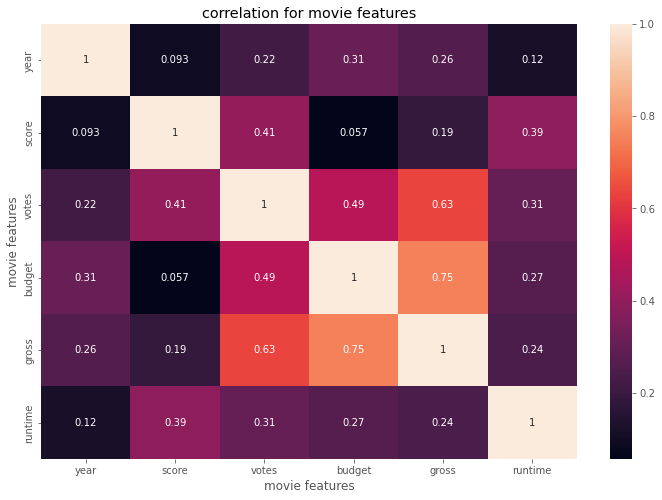

In [23]:
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)#annot just places valuse in boxes
plt.title('correlation for movie features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [24]:
#giving all columns numarical values as finging corelations
df_num=df.copy()
for col in df_num.columns:
    if(df_num[col].dtype=='object'):
        df_num[col]=df_num[col].astype('category')
        df_num[col]=df_num[col].cat.codes
df_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2335,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2242,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1596,55,200000000.0,2.201647e+09,2253,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,2691,6,8,1989,257,6.0,2900.0,2743,946,1196,6,0.0,0.000000e+00,2237,89.0
1601,3836,-1,4,1989,1160,7.1,1500.0,1105,1696,682,18,0.0,0.000000e+00,504,104.0
7667,5394,-1,10,2020,391,5.7,7.0,2165,3344,2464,44,0.0,0.000000e+00,1787,102.0


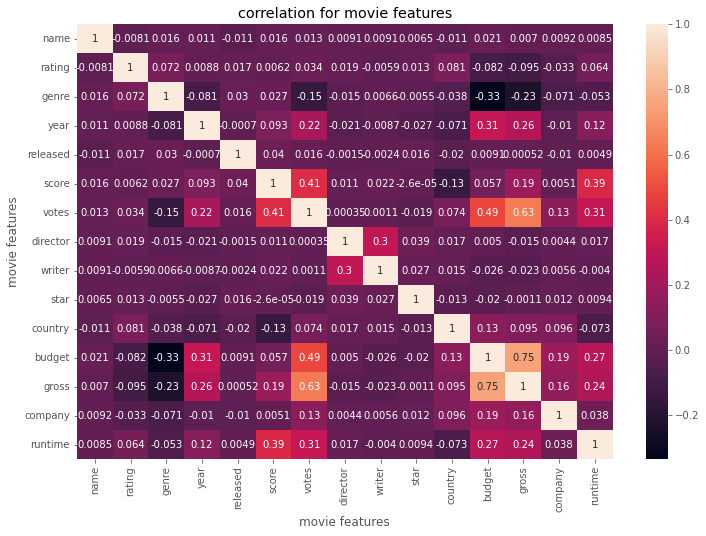

In [25]:
pd.set_option('display.max_rows',None)
corr_mat=df_num.corr()
sns.heatmap(corr_mat,annot=True)#annot just places valuse in boxes
plt.title('correlation for movie features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [31]:
pd.set_option('display.max_row',None)

In [32]:
#unstacking for seeing individual corilation
corr_mat=df_num.corr()
corr_mat.unstack()

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.016377
          votes       0.013038
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.006989
          company     0.009211
          runtime     0.008483
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score       0.006192
          votes       0.033743
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.064133
genre     name        0.016355
          rating      0.072423
        

In [34]:
sorted_mat=corr_mat.unstack().sort_values()
sorted_mat

genre     budget     -0.334021
budget    genre      -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
votes     genre      -0.145296
genre     votes      -0.145296
score     country    -0.133346
country   score      -0.133346
gross     rating     -0.095450
rating    gross      -0.095450
          budget     -0.081939
budget    rating     -0.081939
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.073319
runtime   country    -0.073319
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
genre     runtime    -0.052914
runtime   genre      -0.052914
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
budget    writer     -0.025911
writer    budget     -0.025911
          gross      -0.022997
gross     writer     -0.022997
director

In [36]:
highcorr=sorted_mat[(sorted_mat)>0.5]
highcorr

votes     gross       0.632870
gross     votes       0.632870
          budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64